In [26]:
import numpy as np
import matplotlib.pyplot as plt


In [27]:
X = np.arange(0,5,0.1, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

#making a copy for later use
rx = X

ry = Y

In [28]:
print(X)
print(Y)
#Calculating Yp
def predicting_Yp(X, w, b):
    Yp = []  
    for i in X:
        Yp.append((w * i) + b)
    return Yp


[0.         0.1        0.2        0.3        0.4        0.5
 0.6        0.7        0.8        0.90000004 1.         1.1
 1.2        1.3000001  1.4        1.5        1.6        1.7
 1.8000001  1.9        2.         2.1000001  2.2        2.3
 2.4        2.5        2.6000001  2.7        2.8        2.9
 3.         3.1000001  3.2        3.3        3.4        3.5
 3.6000001  3.7        3.8        3.9        4.         4.1
 4.2000003  4.3        4.4        4.5        4.6        4.7000003
 4.8        4.9       ]
[2.59278858 2.44299905 3.4950303  3.02705034 3.26802957 3.3949996
 3.29403122 2.51921912 3.97264267 4.21378814 2.54324146 3.30561201
 2.50243112 4.46607658 4.25189705 4.08538845 3.4251335  4.64883191
 3.30230054 4.13044757 3.42098869 3.56953108 4.05651678 4.43139619
 4.27172454 4.40411734 4.32003897 3.6981756  4.9058807  4.45557663
 3.56604865 3.79893419 3.4701991  4.68471448 3.5008237  4.60181891
 4.78342926 4.07684452 5.18709618 3.83732293 5.56805124 3.69150569
 5.19455633 5.32529517

In [29]:
#Calculating loss using MSE
def calculate_loss(X, Y, Yp):
    loss = 0 
    for i in range(len(X)):
        loss += (Y[i] - Yp[i])**2
    loss = loss / len(Y)
    return loss

 

In [30]:
#Optimization using SGD
def updating_param(X,Y,Yp,lr,w,b):

    #Updating weight
    sgd = 0
    for i in range(0,len(X)):
        sgd += X[i]*(Y[i] - Yp[i])

    sgd = (-2*sgd)/len(Y)
    w = w -(lr*sgd)

    #Updating Bais
    sgd = 0
    for i in range(0,len(X)):
        sgd += (Y[i] - Yp[i])

    sgd = (-2*sgd)/len(Y)
    b = b -(lr*sgd)

    return w,b



In [31]:
# Function to test prediction for a single input value
def test_value(x, w, b):
    """Returns the predicted value for a single input x."""
    return (w * x) + b

Loss on iteration 0 is: 3.5411599052112077
Loss on iteration 1 is: 2.949804842710122
Loss on iteration 2 is: 2.53447129133751
Loss on iteration 3 is: 2.2294374525580083
Loss on iteration 4 is: 1.9951960933042932
Loss on iteration 5 is: 1.8078303192399447
Loss on iteration 6 is: 1.6527108912774309
Loss on iteration 7 is: 1.5207557855259082
Loss on iteration 8 is: 1.4062090415527928
Loss on iteration 9 is: 1.305320597848653
Loss on iteration 10 is: 1.2155605522934598
Loss on iteration 11 is: 1.135150519654415
Loss on iteration 12 is: 1.0627832271514281
Loss on iteration 13 is: 0.9974539361511703
Loss on iteration 14 is: 0.9383583709566526
Loss on iteration 15 is: 0.8848302696020919
Loss on iteration 16 is: 0.8363026010647415
Loss on iteration 17 is: 0.7922829739933483
Loss on iteration 18 is: 0.7523376053235578
Loss on iteration 19 is: 0.716080496817005
Loss on iteration 20 is: 0.6831658201941164
Loss on iteration 21 is: 0.6532823145027138
Loss on iteration 22 is: 0.6261489763928002
Loss

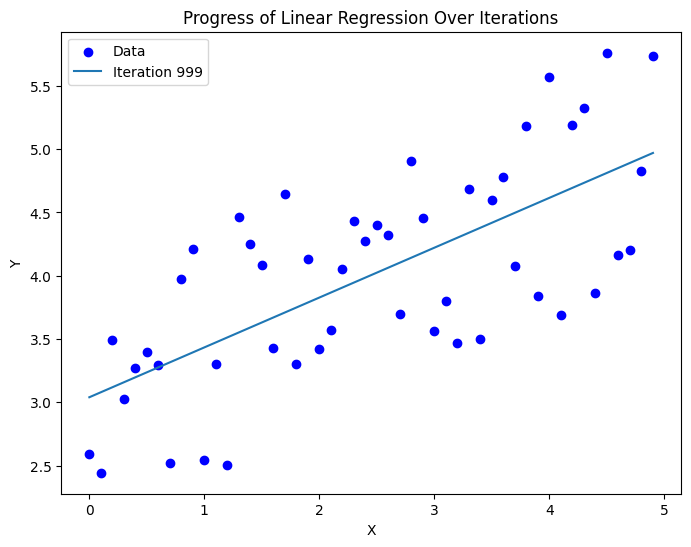

Prediction for input value 2: 3.0790077222568017


In [32]:
# Initial parameters
w = 1
b = 0
lr = 0.1
num_iter = 1000

# Prepare the plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data')

# Loop through iterations and plot the regression line for each step
for i in range(num_iter):
    Yp = predicting_Yp(X, w, b)
    loss = calculate_loss(X, Y, Yp)
    print("Loss on iteration", i, "is:", loss)
    # Update parameters for the next iteration
    w, b = updating_param(X, Y, Yp, lr, w, b)

# Plot the current regression line
plt.plot(X, Yp, label=f'Iteration {i}')
    
# Add legend and labels
plt.legend()
plt.title("Progress of Linear Regression Over Iterations")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# After training, test the prediction for value 2
pred_value = test_value(0.1, w, b)
print("Prediction for input value 2:", pred_value)

In [ ]:
# This is the Code from Sklearn library using built in function to compare out model with.

from sklearn.linear_model import LinearRegression

# Reshape X to a 2D array with one column
X = X.reshape(-1, 1)

model = LinearRegression()
model.fit(X, Y)
print(model.predict([[0.1]]))


[3.07900773]
